<a href="https://colab.research.google.com/github/Rishicode09/Risk-Prediction-Models-in-Python-Credit-Volatility-/blob/main/Self_made_Car_depreciation_accuracy_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

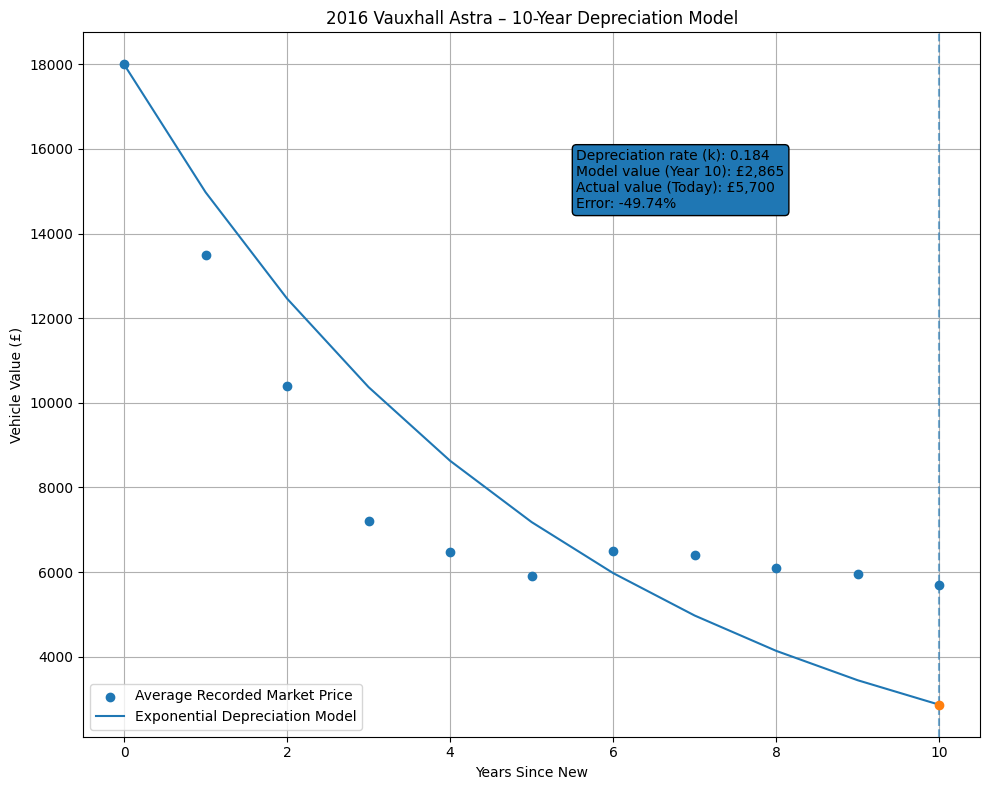

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

V0 = 18000

year = np.arange(0, 11, 1)

average_market_prices = np.array([18000, 13500, 10400, 7200, 6480, 5900, 6500, 6400, 6100, 5950, 5700])

def depreciation(t, k):
  return V0 * np.exp(-k * t)


k, _ = curve_fit(depreciation, year, average_market_prices)
k = k[0]

model_prices = depreciation(year, k)

model_10y = model_prices[-1]
actual_10y = average_market_prices[-1]
pct_error = (model_10y - actual_10y) / actual_10y *100

plt.figure(figsize=(10,8))

plt.scatter(year, average_market_prices, label="Average Recorded Market Price", zorder=3)
plt.plot(year, model_prices, label="Exponential Depreciation Model")

plt.axvline(10, linestyle="--", alpha=0.6)
plt.scatter(10, model_10y, zorder=4)

plt.title("2016 Vauxhall Astra – 10-Year Depreciation Model")
plt.xlabel("Years Since New")
plt.ylabel("Vehicle Value (£)")
plt.legend()

plt.text(
    0.55, 0.75,
    f"Depreciation rate (k): {k:.3f}\n"
    f"Model value (Year 10): £{model_10y:,.0f}\n"
    f"Actual value (Today): £{actual_10y:,.0f}\n"
    f"Error: {pct_error:.2f}%",
    transform=plt.gca().transAxes,
    bbox=dict(boxstyle="round")
)

plt.grid(True)
plt.tight_layout()
plt.show()

